<a href="https://colab.research.google.com/github/jikrey123/data-analysis-journey/blob/main/day8_correlation_and_relationships.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

#cleaning
df = df.drop(columns=['Cabin'])
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] =df['Embarked'].fillna(df['Embarked'].mode()[0])

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Correlation matrix

In [3]:
#select numeric columns
numeric_df = df.select_dtypes(include='number')
numeric_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [5]:
#correlation matrix showing relationships between numerical values
corr = numeric_df.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [6]:
#How to read correlation
# 1 - Perfect positive
# 0 - No relationship
#-1 - Perfect negative

Visual correlation

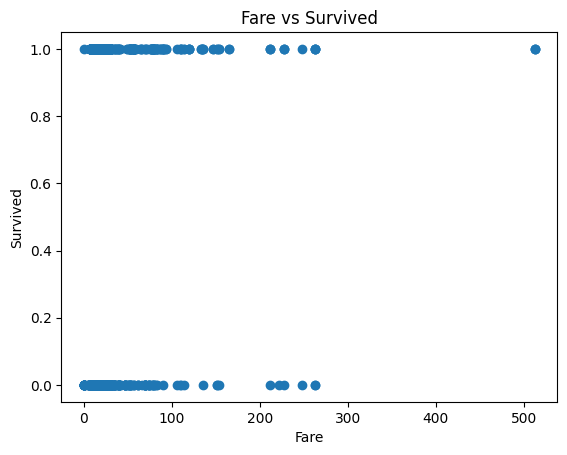

In [7]:
#fare vs survival
import matplotlib.pyplot as plt
plt.scatter(df['Fare'], df['Survived'])
plt.xlabel('Fare')
plt.ylabel('Survived')
plt.title('Fare vs Survived')
plt.show()



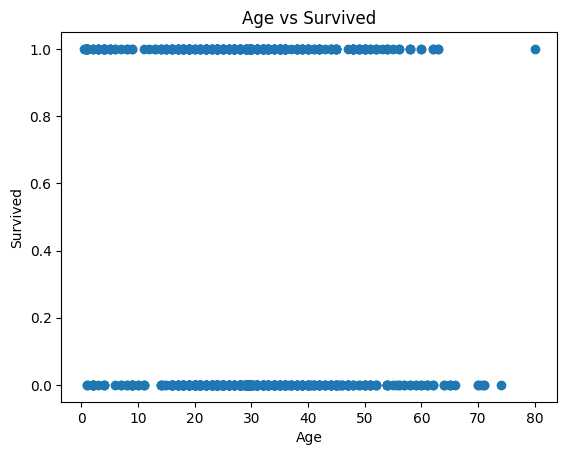

In [8]:
#age vs survival
plt.scatter(df['Age'], df['Survived'])
plt.title('Age vs Survived')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

In [10]:
# Scatter diagram patterns
#upward slope - positive relationship
#donward slope - negative relationhip
#no shape - no strong relationship

Grouped eda

In [9]:
#survival rate by age group
df['age_group'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 80])
df.groupby('age_group')['Survived'].mean()

#Children show high survuval rates compared to adults

/tmp/ipython-input-3383906379.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_group')['Survived'].mean()


,Survived
age_group,
"(0, 12]",0.579710
"(12, 18]",0.428571
"(18, 35]",0.353271
"(35, 60]",0.400000
"(60, 80]",0.227273
